In [3]:
import numpy as np
from PIL import Image,ImageFont,ImageDraw
from PIL.ImageChops import add,subtract,difference,multiply,screen
import PIL.ImageStat as stat
from skimage.io import imread,imsave,imshow,show,imread_collection,imshow_collection
from skimage import color,exposure , img_as_float , data
from skimage.transform import SimilarityTransform,warp,swirl
from skimage.util import invert , random_noise , montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform,zoom
from scipy import misc
import cv2
%matplotlib inline

In [46]:
lena = Image.open('./Image/lena.jpeg')
lenaL = lena.convert('L')
lenaP = lena.convert('P')
lenaL.show()
lenaP.show()

204 204 L None <class 'PIL.Image.Image'>


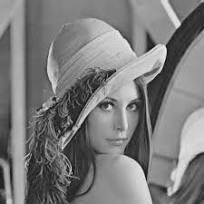

In [8]:
print(lenaL.width,lenaL.height,lenaL.mode,lenaL.format,type(lenaL))
lenaL

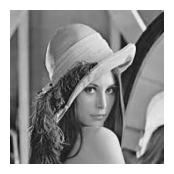

In [11]:
plt.figure(figsize=(2,2))
# plt.imshow(lenaL) #Display an image
plt.imshow(lenaL,cmap='gray') #Display the image in grayscale
plt.axis('off') #Turn off the axis
plt.show()


In [13]:
x=np.array(lenaL)
x

array([[161, 161, 160, ..., 154, 175, 158],
       [160, 160, 160, ..., 167, 169, 150],
       [160, 160, 159, ..., 122, 105,  86],
       ...,
       [ 46,  56,  50, ...,  69,  79,  86],
       [ 42,  53,  48, ...,  79,  89,  96],
       [ 43,  54,  47, ...,  87,  97, 104]], dtype=uint8)

In [14]:
print(x.shape)

(204, 204)


In [20]:
img=imread('./Image/lena.jpeg')
img.shape

(204, 204, 3)

(204, 204)
(204, 204)


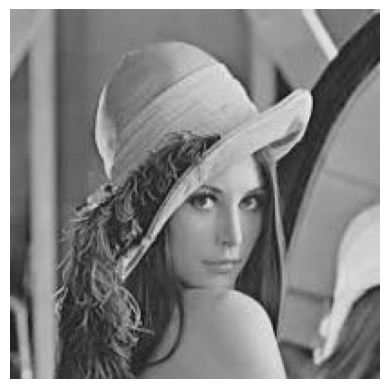

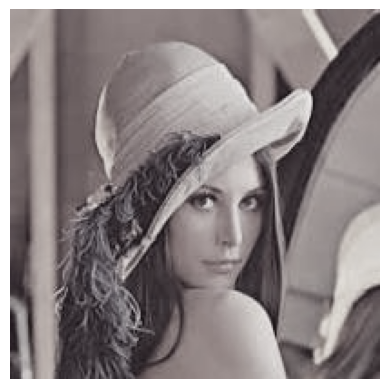

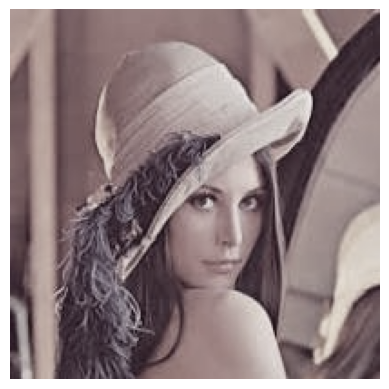

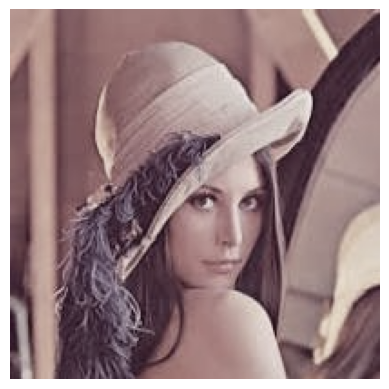

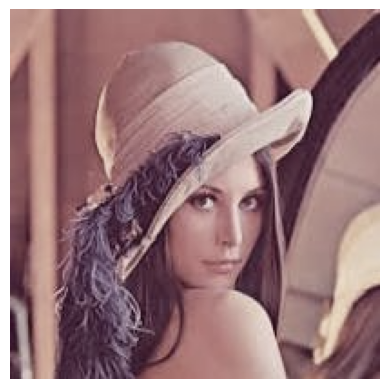

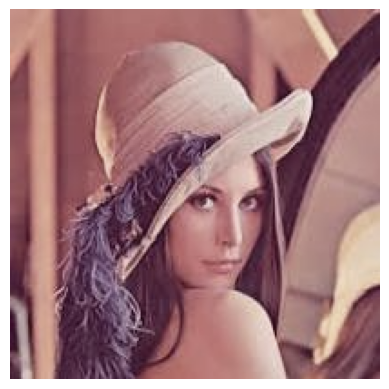

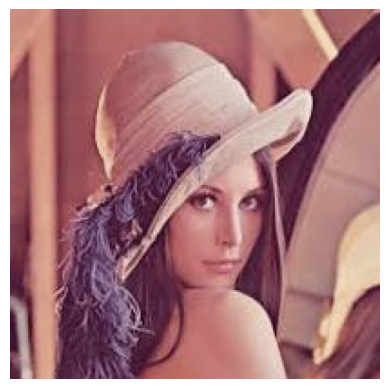

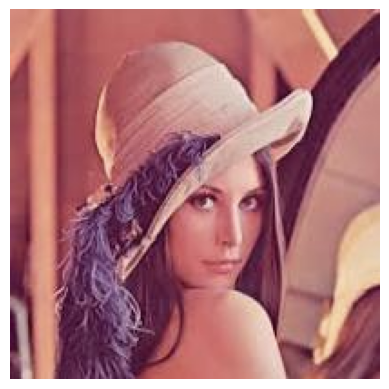

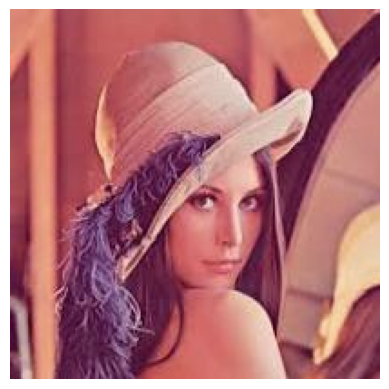

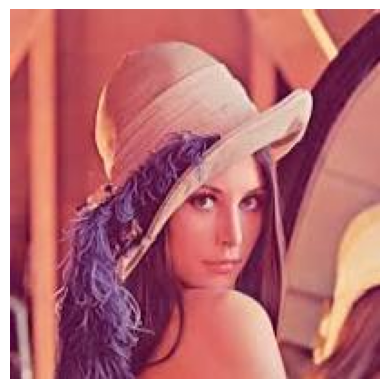

In [55]:
img1=lenaL
# img1=img1.resize((100,100))
img1=img1.convert("RGB")
img2= lena
# img2=img2.resize((100,100))
img1.show()
print(img1.size)
print(img2.size)
for alpha in np.linspace(0,1,10):
    img3=Image.blend(img1,img2,alpha)
    img3=img3.convert("RGB")
    # img3=(1-alpha)*img2+alpha*img1
    # plt.subplot(1,2,1)
    plt.imshow(img3)
    plt.axis('off')
    plt.show()

In [37]:
img1=Image.open('./Image/lena.jpeg')
img1=img1.resize((100,100))
img2= Image.open('./Image/download.jpeg')
img2=img2.resize((100,100))
print(img1.size)
print(img2.size)

(100, 100)
(100, 100)


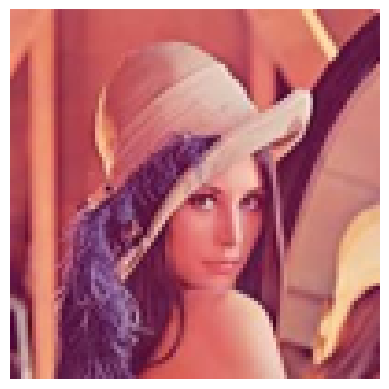

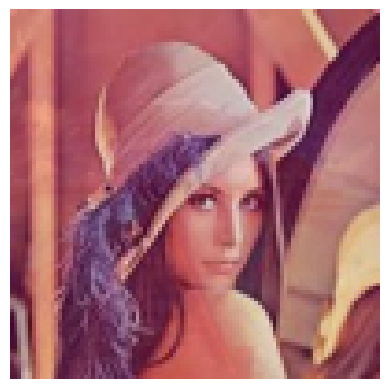

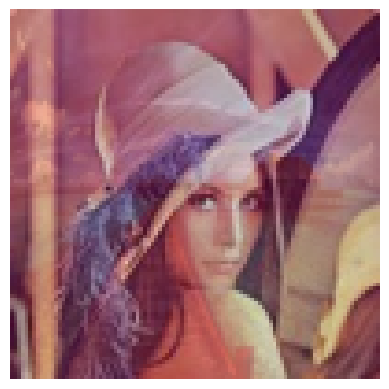

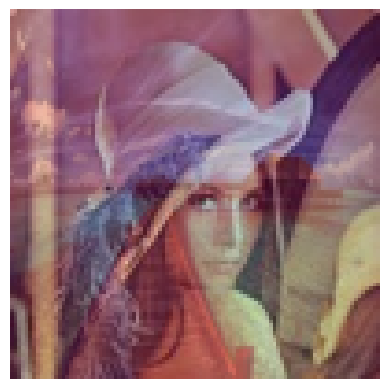

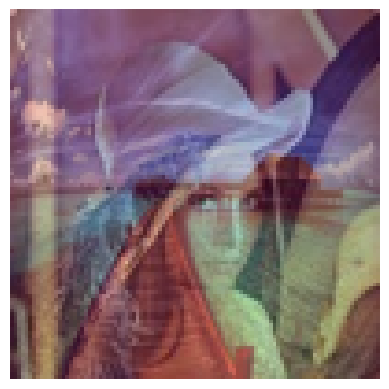

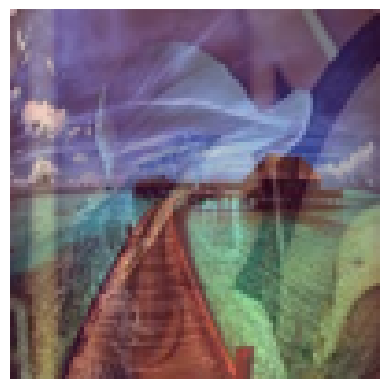

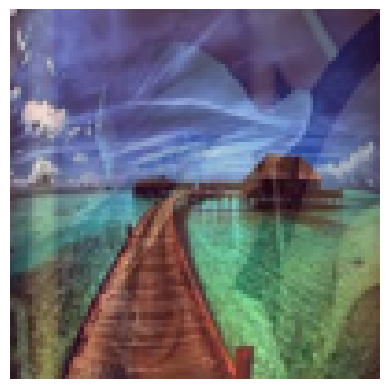

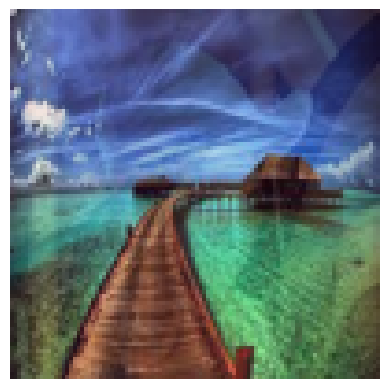

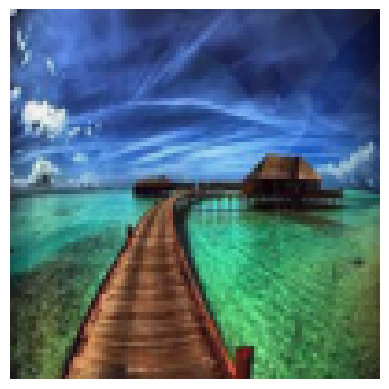

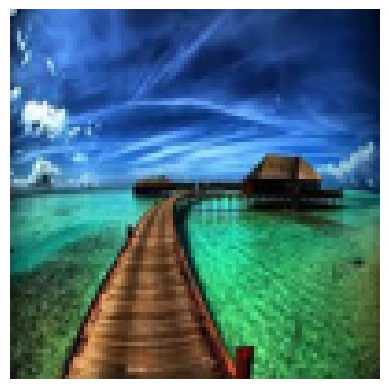

In [38]:
for alpha in np.linspace(0,1,10):
    img3=Image.blend(img1,img2,alpha)
    # img3=(1-alpha)*img2+alpha*img1
    plt.imshow(img3)
    plt.axis('off')
    plt.show()

0.0
0.034482758620689655
0.06896551724137931
0.10344827586206896
0.13793103448275862
0.1724137931034483
0.20689655172413793
0.24137931034482757
0.27586206896551724
0.3103448275862069
0.3448275862068966
0.3793103448275862
0.41379310344827586
0.4482758620689655
0.48275862068965514
0.5172413793103449
0.5517241379310345
0.5862068965517241
0.6206896551724138
0.6551724137931034
0.6896551724137931
0.7241379310344828
0.7586206896551724
0.7931034482758621
0.8275862068965517
0.8620689655172413
0.896551724137931
0.9310344827586207
0.9655172413793103
1.0


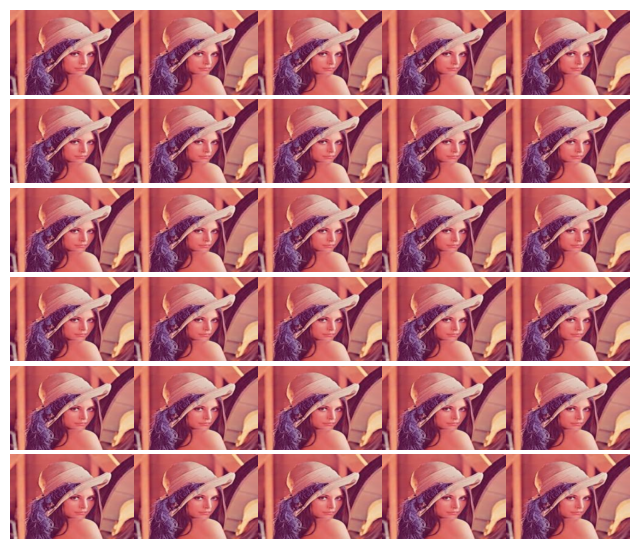

In [40]:
#image blending
#produce mulitple intermediate photos , then we run through speedily 
# which gives illusion of One image converting to another image

#Signal Super Imposition

#resizing both image to same size for blending as it is compulsory for blending
#modes of both imagee must be same if rgb then both rgb
#converting image to signal using normal distribution , where image normalize by dividing through highest intensity (255)
im1 = mpimg.imread("Image/lena.jpeg")/255
im2 = Image.open('Image/lena.jpeg')
im3 = np.array(im2.resize((1200,822),Image.BILINEAR))/255

im1_resized = np.array(Image.fromarray((im1 * 255).astype('uint8')).resize((1200, 822), Image.BILINEAR)) / 255

# Plot the blended images
i = 1
plt.figure(figsize=(8, 15))
for alpha in np.linspace(0, 1, 30):
    print(alpha)
    plt.subplot(13, 5, i) #this line indicates vertical distance between images row
    o_img = (1 - alpha) * im3 + alpha * im1_resized
    plt.imshow(o_img)
    plt.axis('off')
    i += 1
    plt.subplots_adjust(wspace=0.005, hspace=0.005)

plt.show()